In [58]:
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

def read_distance_file(cos_distance_file):
    word2shift = {}
    rows = []
    with open(cos_distance_file) as f:
        for line in f:
            word, shift = line.split()
            word, shift = word.strip(), float(shift.strip())
            if (shift > 0):
                word2shift[word] = shift
                rows.append([word, shift])
    df = pd.DataFrame(rows, columns=['word', 'change'])
    return word2shift, df

def calculate_mean_shift(word2shift):
    return np.mean([v for k, v in word2shift.items()])


In [59]:
# for num_layer in range(1, 13):

num_layer = 1
word2shift, df = read_distance_file("../../data/blm_alm/raw/results/shared_vocab_last_layer1_anti_blm_100k_pro_blm_200k_cos_dist.csv")


In [60]:
df.sort_values(by="change", ascending=False).head(20)

,word,change
1189,#equalrights,0.385119
1595,vid,0.287850
644,#voterid,0.238633
186,#kag,0.230080
720,courage,0.221347
252,#healing,0.213069
813,#guncontrol,0.204876
1853,#institutionalracism,0.204025
1086,honesty,0.203854
1110,spoken,0.189554


Text(0, 0.5, 'Count')

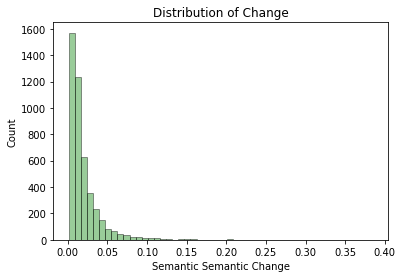

In [62]:
# seaborn histogram
sns.distplot(df['change'], hist=True, kde=False, color = 'green',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Change')
plt.xlabel('Semantic Semantic Change')
plt.ylabel('Count')